In [68]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import Ridge,Lasso #type : ignore
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing

In [69]:

df = pd.DataFrame(data.data,columns=data.feature_names)

In [70]:
target = pd.DataFrame(data.target,columns=data.target_names)

In [71]:
y= target

In [72]:
X = df

In [73]:
X.drop(columns=['Latitude','Longitude'],axis=1,inplace=True)

In [74]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=70,st_size=0.3)

TypeError: got an unexpected keyword argument 'st_size'

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
lasso_reg = Lasso()
parameters = { 'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,50,70,80,90]}
lassocv = GridSearchCV(lasso_reg,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e+02, tolerance: 1.538e+00
  model = cd_fast.enet_coordinate_descent(
/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.944e+01, tolerance: 1.525e+00
  model = cd_fast.enet_coordinate_descent(
/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 50, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [99]:
print(lassocv.best_params_)

{'alpha': 0.001}


In [100]:
print(lassocv.best_score_)

-0.6146909058794179


In [101]:
y_pred = lassocv.predict(X_test)

In [102]:
y_test = y_test.values.flatten()  # Convert it to a 1D numpy array


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [103]:
y_test

array([0.675, 4.611, 2.86 , ..., 1.317, 2.793, 2.691])

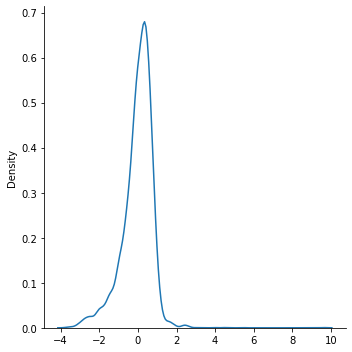

In [104]:
import seaborn as sns
sns.displot(y_pred - y_test,kind='kde')

In [105]:
from sklearn.metrics import r2_score,accuracy_score

In [106]:
r2_score(y_test,y_pred)

0.5314686613213724

In [107]:
print(len(y_pred), len(y_test))


6192 6192
